# Q-Learning

In [1]:
import numpy as np
import pylab as plt

# map cell to cell, add circular cell to goal point
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]

In [2]:
goal = 7

import networkx as nx
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
print("positions",pos)

positions {0: array([ 0.42148198, -0.41806868]), 1: array([ 0.07568496, -0.07462986]), 5: array([-0.49572917, -0.42612082]), 6: array([-0.68282371, -0.89539671]), 4: array([-0.99496367, -0.3761699 ]), 2: array([0.4203348, 0.5001681]), 3: array([0.36972808, 1.        ]), 7: array([0.88628673, 0.69021786])}


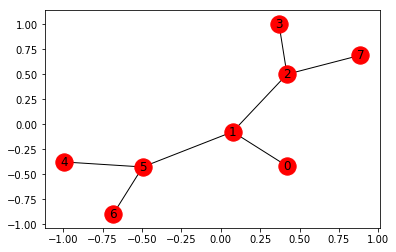

In [3]:
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [4]:
MATRIX_SIZE = 8
# create matrix x*y
 
R *= -1
R

matrix([[-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.]])

In [5]:
# goal = 7
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        # reverse of point
        R[point[::-1]]= 0

# add goal point round trip
R[goal,goal]= 100

R

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1., 100.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 100.]])

In [7]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# learning parameter
gamma = 0.8

initial_state = 1

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state)

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)

def update(current_state, action, gamma):
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]

    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_value', R[current_state, action] + gamma * max_value)

    if (np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)

update(initial_state, action, gamma)

max_value 0.0


0

In [8]:
# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))

print("Trained Q matrix:")
print(Q/np.max(Q)*100)


max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 100.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 180.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 244.0
Score: 100.0
max_value 295.20000000000005
Score: 182.65582655826557
max_value 236.16000000000005
Score: 262.6558265582656
max_value 188.92800000000005
Score: 326.655826558265

Score: 982.1440815152114
max_value 312.79424059620726
Score: 982.1440815152114
max_value 250.2353924769658
Score: 982.1440815152114
max_value 312.79424059620726
Score: 982.1440815152114
max_value 390.99280074525905
Score: 982.1440815152114
max_value 250.2353924769658
Score: 982.1440815152114
max_value 312.79424059620726
Score: 982.1440815152114
max_value 312.79424059620726
Score: 982.1440815152114
max_value 390.99280074525905
Score: 982.1440815152114
max_value 312.79424059620726
Score: 982.1440815152114
max_value 312.79424059620726
Score: 982.1440815152114
max_value 250.2353924769658
Score: 982.1440815152114
max_value 312.79424059620726
Score: 982.1440815152114
max_value 312.79424059620726
Score: 982.1440815152114
max_value 312.79424059620726
Score: 982.1440815152114
max_value 250.2353924769658
Score: 982.1440815152114
max_value 390.99280074525905
Score: 982.1440815152114
max_value 312.79424059620726
Score: 982.1440815152114
max_value 312.79424059620726
Score: 982.1440815152114
max_val

max_value 399.03285934430846
Score: 981.1690130389316
max_value 399.03285934430846
Score: 981.1690130389316
max_value 399.03285934430846
Score: 981.1690130389316
max_value 255.22628747544678
Score: 981.1690130389316
max_value 319.2262874754468
Score: 981.2077370155282
max_value 319.2262874754468
Score: 981.2077370155282
max_value 255.22628747544678
Score: 981.2077370155282
max_value 255.22628747544678
Score: 981.2077370155282
max_value 319.2262874754468
Score: 981.2077370155282
max_value 255.22628747544678
Score: 981.2077370155282
max_value 255.22628747544678
Score: 981.2077370155282
max_value 499.6038591874288
Score: 981.0330574456219
max_value 499.68308734994304
Score: 981.0560237431396
max_value 255.22628747544678
Score: 981.0560237431396
max_value 399.7464698799545
Score: 981.1988363685239
max_value 319.2262874754468
Score: 981.1988363685239
max_value 319.7971759039636
Score: 981.3130864688313
max_value 319.2262874754468
Score: 981.3130864688313
max_value 255.22628747544678
Score: 

Most efficient path:
[0, 1, 2, 7]


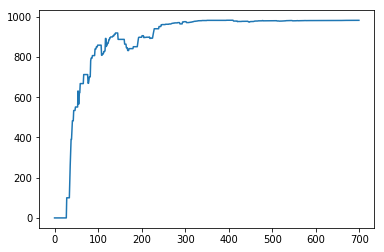

In [11]:
# Testing
current_state = 0
steps = [current_state]

while current_state != 7:

    next_step_index = np.where(Q[current_state,]
        == np.max(Q[current_state,]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index =int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

plt.plot(scores)
plt.show()

# Most efficient path:
# [0, 1, 2, 7]

# Environmental Details

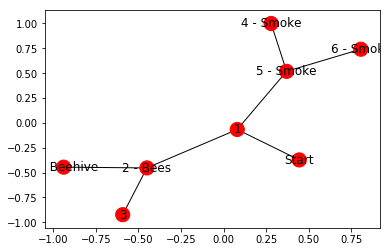

In [12]:
import numpy as np
import pylab as plt

# map cell to cell, add circular cell to goal point
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]


bees = [2]
smoke = [4,5,6]

G=nx.Graph()
G.add_edges_from(points_list)
mapping={0:'Start', 1:'1', 2:'2 - Bees', 3:'3',
    4:'4 - Smoke', 5:'5 - Smoke', 6:'6 - Smoke', 7:'7 - Beehive'}
H=nx.relabel_nodes(G,mapping)
pos = nx.spring_layout(H)
nx.draw_networkx_nodes(H,pos,
    node_size=[200,200,200,200,200,200,200,200])
nx.draw_networkx_edges(H,pos)
nx.draw_networkx_labels(H,pos)
plt.show()

In [13]:
# re-initialize the matrices for new run
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

enviro_bees = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
enviro_smoke = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

initial_state = 1

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

def collect_environmental_data(action):
    found = []
    if action in bees:
        found.append('b')

    if action in smoke:
        found.append('s')
    return (found)

available_act = available_actions(initial_state)

action = sample_next_action(available_act)

def update(current_state, action, gamma):
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]

    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_value', R[current_state, action] + gamma * max_value)

    environment = collect_environmental_data(action)
    if 'b' in environment:
        enviro_bees[current_state, action] += 1

    if 's' in environment:
        enviro_smoke[current_state, action] += 1

    if (np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)

update(initial_state,action,gamma)

scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)

# print environmental matrices
print('Bees Found')
print(enviro_bees)
print('Smoke Found')
print(enviro_smoke)

max_value 0.0
max_value 100.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 80.0
max_value 0.0
max_value 0.0
max_value 164.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 80.0
max_value 0.0
max_value 231.20000000000002
max_value 64.0
max_value 0.0
max_value 0.0
max_value 64.0
max_value 64.0
max_value 231.20000000000002
max_value 0.0
max_value 51.2
max_value 51.2
max_value 51.2
max_value 0.0
max_value 64.0
max_value 51.2
max_value 40.96000000000001
max_value 51.2
max_value 0.0
max_value 231.20000000000002
max_value 64.0
max_value 40.96000000000001
max_value 184.96000000000004
max_value 64.0
max_value 284.96000000000004
max_value 327.9680000000001
max_value 362.3744000000001
max_value 64.0
max_value 289.8995200000001
max_value 231.9196160000001
max_value 51.2
max_value 185.5356928000001
max_value 51.2
max_value 231.9196160000001
max_value

max_value 255.18760184921908
max_value 255.18760184921908
max_value 399.8637022074636
max_value 255.18760184921908
max_value 255.18760184921908
max_value 319.89096176597087
max_value 319.89096176597087
max_value 399.8637022074636
max_value 255.18760184921908
max_value 319.89096176597087
max_value 319.89096176597087
max_value 255.18760184921908
max_value 255.18760184921908
max_value 399.8637022074636
max_value 255.18760184921908
max_value 255.18760184921908
max_value 399.8637022074636
max_value 319.89096176597087
max_value 255.18760184921908
max_value 399.8637022074636
max_value 319.89096176597087
max_value 255.9127694127767
max_value 255.9127694127767
max_value 399.8637022074636
max_value 255.18760184921908
max_value 204.15008147937527
max_value 319.89096176597087
max_value 255.18760184921908
max_value 319.89096176597087
max_value 319.89096176597087
max_value 319.89096176597087
max_value 399.8637022074636
max_value 319.89096176597087
max_value 399.8637022074636
max_value 319.8909617659

In [14]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# subtract bees with smoke, this gives smoke a negative effect
enviro_matrix = enviro_bees - enviro_smoke

# Get available actions in the current state
available_act = available_actions(initial_state)

# Sample next action to be performed
action = sample_next_action(available_act)

# This function updates the Q matrix according to
# the path selected and the Q learning algorithm
def update(current_state, action, gamma):

    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]

    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_value', R[current_state, action] + gamma * max_value)

    environment = collect_environmental_data(action)
    if 'b' in environment:
        enviro_matrix[current_state, action] += 1
    if 's' in environment:
        enviro_matrix[current_state, action] -= 1

    return(np.sum(Q/np.max(Q)*100))

update(initial_state,action,gamma)

enviro_matrix_snap = enviro_matrix.copy()

def available_actions_with_enviro_help(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    # if there are multiple routes, dis-favor anything negative
    env_pos_row = enviro_matrix_snap[state,av_act]
    if (np.sum(env_pos_row < 0)):
        # can we remove the negative directions from av_act?
        temp_av_act = av_act[np.array(env_pos_row)[0]>=0]
        if len(temp_av_act) > 0:
            print('going from:',av_act)
            print('to:',temp_av_act)
            av_act = temp_av_act
    return av_act

max_value 0.0


C:\Users\Ayra\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


max_value 0.0
Score: nan
max_value 0.0
Score: nan
max_value 0.0
Score: nan
max_value 0.0
Score: nan
max_value 0.0
Score: nan
max_value 0.0
Score: nan
going from: [1 4 6]
to: [1]
max_value 0.0
Score: nan
max_value 0.0
Score: nan
going from: [0 2 5]
to: [0 2]
max_value 0.0
Score: nan
going from: [0 2 5]
to: [0 2]
max_value 0.0
Score: nan
going from: [0 2 5]
to: [0 2]
max_value 0.0
Score: nan
going from: [1 4 6]
to: [1]
max_value 0.0
Score: nan
max_value 100.0
Score: 100.0
max_value 80.0
Score: 180.0
max_value 0.0
Score: 180.0
going from: [0 2 5]
to: [0 2]
max_value 0.0
Score: 180.0
max_value 0.0
Score: 180.0
max_value 80.0
Score: 180.0
max_value 64.0
Score: 244.0
max_value 100.0
Score: 344.0
going from: [1 4 6]
to: [1]
max_value 0.0
Score: 344.0
max_value 80.0
Score: 344.0
max_value 80.0
Score: 344.0
max_value 0.0
Score: 344.0
max_value 0.0
Score: 344.0
max_value 0.0
Score: 344.0
max_value 0.0
Score: 344.0
max_value 80.0
Score: 344.0
max_value 0.0
Score: 344.0
max_value 0.0
Score: 344.0


C:\Users\Ayra\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


max_value 300.4286930255873
Score: 810.6676434756199
max_value 240.34295442046982
Score: 810.6676434756199
max_value 300.4286930255873
Score: 810.6676434756199
max_value 240.34295442046982
Score: 810.6676434756199
max_value 300.4286930255873
Score: 812.8980229184481
max_value 494.86949930449964
Score: 811.0503015456698
max_value 375.5358662819841
Score: 811.0503015456698
max_value 240.34295442046982
Score: 811.0503015456698
going from: [0 2 5]
to: [0 2]
max_value 240.34295442046982
Score: 811.0503015456698
max_value 375.5358662819841
Score: 811.0503015456698
going from: [1 4 6]
to: [1]
max_value 300.4286930255873
Score: 811.0503015456698
max_value 240.34295442046982
Score: 811.0503015456698
max_value 375.5358662819841
Score: 811.0503015456698
max_value 495.89559944359974
Score: 814.7110677107974
max_value 300.4286930255873
Score: 814.7110677107974
max_value 396.7164795548798
Score: 818.9822516649725
max_value 240.34295442046982
Score: 818.9822516649725
max_value 300.4286930255873
Score

Score: 849.3888035026683
max_value 319.5592933460145
Score: 849.3888035026683
going from: [0 2 5]
to: [0 2]
max_value 255.6474346768116
Score: 849.3888035026683
max_value 399.6474346768116
Score: 849.3888035026683
max_value 255.6474346768116
Score: 849.3888035026683
max_value 399.6474346768116
Score: 849.3888035026683
max_value 255.6474346768116
Score: 849.3888035026683
max_value 499.6474346768116
Score: 849.2566060333311
max_value 255.6474346768116
Score: 849.2566060333311
max_value 499.7179477414493
Score: 849.1685198506939
max_value 499.7179477414493
Score: 849.1826304234594
max_value 399.77435819315946
Score: 849.2080294544371
going from: [1 4 6]
to: [1]
max_value 319.5592933460145
Score: 849.2080294544371
going from: [0 2 5]
to: [0 2]
max_value 399.77435819315946
Score: 849.2731144713173
max_value 255.6474346768116
Score: 849.2731144713173
max_value 399.77435819315946
Score: 849.2731144713173
max_value 319.8194865545276
Score: 849.3251824848217
going from: [1 4 6]
to: [1]
max_valu

Score: 849.5827702502579
max_value 399.9900761683868
Score: 849.5832664541492
max_value 319.98061751638033
Score: 849.5832664541492
max_value 399.9900761683868
Score: 849.5837626580403
max_value 399.9900761683868
Score: 849.5837626580403
going from: [0 2 5]
to: [0 2]
max_value 255.98449401310427
Score: 849.5837626580403
max_value 255.98449401310427
Score: 849.5837626580403
going from: [0 2 5]
to: [0 2]
max_value 399.9900761683868
Score: 849.5866235836011
max_value 399.9900761683868
Score: 849.5866235836011
max_value 399.9900761683868
Score: 849.5866235836011
max_value 255.98449401310427
Score: 849.5866235836011
going from: [0 2 5]
to: [0 2]
max_value 399.9900761683868
Score: 849.5866235836011
max_value 255.98449401310427
Score: 849.5866235836011
going from: [1 4 6]
to: [1]
max_value 319.99206093470946
Score: 849.5889123240495
going from: [0 2 5]
to: [0 2]
max_value 399.9900761683868
Score: 849.5889123240495
max_value 255.99364874776757
Score: 849.5907433164084
going from: [1 4 6]
to: [

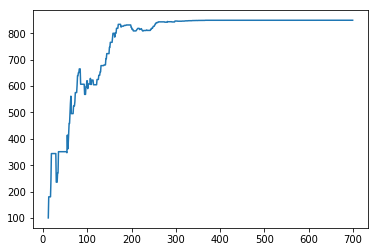

In [15]:
# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions_with_enviro_help(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))


plt.plot(scores)
plt.show()